# Исследование успешности игр

**Описание проекта**
<br><br>Мы имеем исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(ПК, Xbox, PlayStation и тд). Нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании для продажи игр интернет-магазина на следующий год.
<br><br>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

## Изучение данных из файла

Чтобы изучить данные таблицы, сделать необходимые рассчёты и провести исследование сразу импортируем библиотеки, который нам потребуются в данном проекте:

In [1]:
from io import BytesIO # импорт библиотеки BytesIO
from scipy import stats as st # импорт библиотеки stats

import matplotlib.pyplot as plt # импорт библиотеки matplotlib.pyplot
import numpy as np # импорт библиотеки numpy
import pandas as pd # импорт библиотеки pandas
import requests  # импорт библиотеки requests
import seaborn as sns # импорт библиотеки seaborn

Сохраним файл на `Google Sheets` и расшарим его, чтобы он окрывался с любого локального `Jupyter`:

In [2]:
spreadsheet_id = '17kJxwxuAuuKC0c_51BTKxNqd-IQmQK4mpV-lG2Rb7TI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
games = pd.read_csv(BytesIO(r.content))# чтение файла с данными и сохранение в df
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получим общую информацию о таблице:

In [3]:
games.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. Типы данных в столбцах — `float`, `object`.

Согласно документации к данным:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Вывод**
<br><br>
В каждой строке таблицы — данные об игре, её продажах по регионам и её рейтингах. 
<br><br>
Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.
<br><br>
Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных

Исправим данные и приведём их к пригодному для анализа виду.

### Стиль заголовков

Посмотрим названия столбцов:

In [4]:
games.columns # перечень названий столбцов таблицы

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведём названия в соответствие с хорошим стилем:

In [5]:
games.columns = games.columns.str.lower() # все заглавные буквы сделаем строчными

Проверим результат. Для этого ещё раз выведите на экран названия столбцов:

In [6]:
games.columns # перечень названий столбцов таблицы

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод**
<br><br>Названия колонок приведены к хорошему стилю написания

### Обработка пропусков

Сначала посчитаем, сколько в таблице пропущенных значений:

In [7]:
games.isna().sum() # подсчёт пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим, что за пропуски в  столбцах `name` и `genrt`:

In [8]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Посмотрим все игры платформы `GEN`:

In [10]:
games.query('platform == "GEN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


Оказалось, что пропуски в столбцах `name` и `genrt` - это одинаковые строчки.
<br>В этих строчках есть только название платформы, год выпуска игры и показатели продаж в разных регионах.
<br>Показатели продаж по платформе нам потребуются для дальнейшего исследования. 
<br>Заменим пропуски в этих столбцах  на `unknown` для `name` и на `Platform` для `genre`:

In [11]:
games['name'] = games['name'].fillna('unknown') # Заменяем пропуски в названии игр
games['genre'] = games['genre'].fillna('Platform') # Заменяем пропуски  в жанрах игр

У пропусков в дате выпуска игры нет какой-то логики или закономерности судя по данным ниже:

In [12]:
games[games['year_of_release'].isnull()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заменим пропуски фиктивно в дате выпуска игры на 1979:

In [13]:
games['year_of_release'] = games['year_of_release'].fillna(1979) # Заменяем пропуски в дате выпуска игры

Чтобы в дальнейшем привести к нужным типам столбцы `critic_score` и `user_score`, заменим пропуски в этих столбцах значениями -1 и -0,1 соответственно:

In [14]:
games['critic_score'] = games['critic_score'].fillna(-1) # Заменяем пропуски в оценке критиков
games['user_score'] = games['user_score'].fillna(-0.1) # Заменяем пропуски в оценке пользователей

Посмотрим какие значения имеются в столбцах `critic_score` и `user_score`:

In [15]:
games['critic_score'].value_counts()

-1.0     8578
 70.0     256
 71.0     254
 75.0     245
 78.0     240
         ... 
 20.0       3
 21.0       1
 17.0       1
 22.0       1
 13.0       1
Name: critic_score, Length: 83, dtype: int64

In [16]:
games['user_score'].value_counts()

-0.1    6701
tbd     2424
7.8      324
8        290
8.2      282
        ... 
1.1        2
1.9        2
9.6        2
0          1
9.7        1
Name: user_score, Length: 97, dtype: int64

Мы видим, что в столбце `user_score` встречает значение `tbd` 2424 раза. 
<br> Данная аббрeвиатура означает to be determined, что переводится, как "предстоит определить" ("не определено").
<br> Заменим данное значение по аналогии с пропусками на -0.1:

In [17]:
games = games.replace(to_replace = 'tbd', value = -0.1) # заменим значения "tbd" на -0,1

Заменим пропуски в столбце рейтинг:

In [18]:
games['rating'] = games['rating'].fillna('unknown')# заменим пропуски в столбце рейтинг

In [19]:
games['rating'].value_counts()

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

In [20]:
games.isna().sum() # подсчёт пропусков

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Вывод**
<br><br>
Пропуски в имени и жанре были в 2 одинаковых строчка.
<br>В этих строчках есть только название платформы, год выпуска игры и показатели продаж в разных регионах.
<br>Заменим пропуски в этих столбцах на unknown для name, тк имя сложно заменить чем-то другим, если нет информации о всех выпускаемых играх платформой и на Platform для genre, тк это самый распространённый жанр у данной платформы.
<br><br>
В столбце с датами выпуска игры заменили пропуски на 0, тк это значение выбивается из общего списка и нельзя выпустить игру в 0 году. 
<br><br>
В столбцах с оценками экспертов и оценками критиков замену сделал на несуществующие значения, как -1 и -0.1, тк при замене на 0 в данных столбцах это может повлиять на дальнейшее исследование.
<br><br>
В столбце оценка пользователей аббревиатуру 'tbd' ("to be determined" - "предстоит определить") мы тоже заменяем на значение -0.1.
<br><br>
К пропускам в столбцах `name`, `year_of_release` и `genre` могли привести проблемы с данными при копировании, переносе, хранении и тд.
<br>
К пропускам в столбцах `critic_score` и `user_score` и `rating` могли привести отсутствие данных от пользователей, тк не на все игры оставляют отзывы эксперты и пользователи.
<br>
К пропускам в столбце `rating` могло привести, что ассоциация ESRB (Entertainment Software Rating Board) была основана в 1994 году, а многи  игры были выпущены раньше.


###  Преобразуем данные в нужные типы.

Посмотрим вид значений в столбцах, где мы хотим сделать изменение типа данных:

In [21]:
games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1979.0     269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [22]:
games['critic_score'].value_counts()

-1.0     8578
 70.0     256
 71.0     254
 75.0     245
 78.0     240
         ... 
 20.0       3
 21.0       1
 17.0       1
 22.0       1
 13.0       1
Name: critic_score, Length: 83, dtype: int64

In [23]:
games['user_score'].value_counts()

-0.1    9125
7.8      324
8        290
8.2      282
8.3      254
        ... 
1.5        2
0.3        2
1.1        2
0          1
9.7        1
Name: user_score, Length: 96, dtype: int64

Заменим вещественные данные на целочисленные в столбцах дата выпуска игры и оценка критиков:

In [24]:
games['year_of_release'] = games['year_of_release'].astype('int') # заменим вещественные данные на числовые используя метод astype в дате выпуска игры
games['critic_score'] = games['critic_score'].astype('int') # заменим вещественные данные на числовые используя метод astype в оценке критиков

В столбце оценка пользователей умножим значения на 10, чтобы у оценок пользователей был одинаковый численный ранг с оценкой критиков и далее изменим вещественные данные на целочисленные:

In [25]:
games['user_score'] = games['user_score'].apply(pd.to_numeric) # заменим значения в столбце оценки пользователей на вещественные используя метод astype в оценке критиков
games['user_score'] = games['user_score'].apply(lambda x: x*10) # оценку пользователей умножим на 10, чтобы у оценок пользователей был одинаковый числовой ранг с оценкой критиков
games['user_score'] = games['user_score'].astype('int') # заменим вещественные данные на числовые используя метод astype в оценке пользователей

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  int32  
 10  rating           16715 non-null  object 
dtypes: float64(4), int32(3), object(4)
memory usage: 1.2+ MB


**Вывод**
<br><br>
Замену типов данные выполнили в столбцах `year_of_release`, `critic_score` и `user_score`, тк нам потребуются данные в этих столбцах для дальнейшего исследования и  подсчётов в данных столбцах, а с типом  данных `int` делать это удобнее всего.


###  Посчитаем суммарные продажи

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [27]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] +  games['jp_sales'] + games['other_sales']

**Вывод**
<br><br>
Добавили новый столбец `total_sales` и посчитали в нём суммарные продажи по  всем регионам в миллионах копий.

## Проводим исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды

Посмотрим как распределились результаты по годам:

In [28]:
count_games_year = pd.pivot_table(games, index='year_of_release', values = 'name', aggfunc='count')# сделаем новую таблицу с подсчётом числа выпуска игр по годам
count_games_year

,name
year_of_release,
1979,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Посмотрим как на графике выглядит выпуск игр за все периоды и при этом исключим значения, которые указали в качестве заглушки (1979 год):

<AxesSubplot:xlabel='year_of_release'>

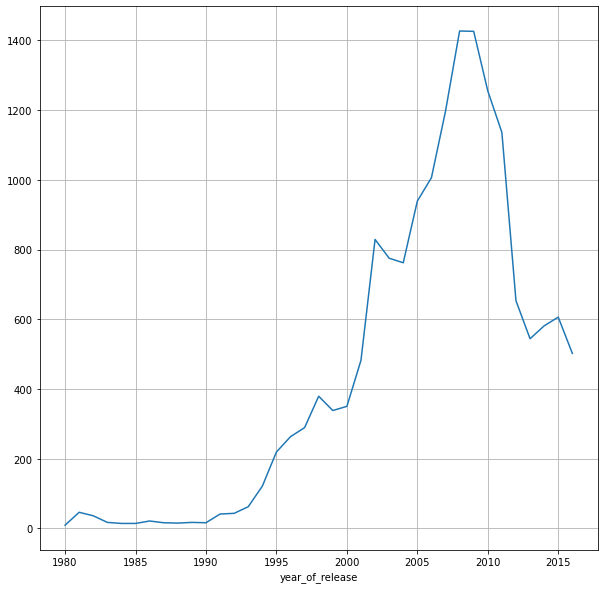

In [29]:
count_games_year.drop(1979)['name'].plot(figsize = (10, 10), grid=True)

**Вывод**
<br><br>
C 1980 года игр каждый год  выпускалось всё больше и больше до 2008 год, далее число игр выпускаемых в год стало постепено снижаться. Распределение по десятилетиям примерно такое:

   * В восьмидесятые выпускалось от 9 до 46 игр в год.
   * В девяностые выпускалось от 16 до 338 игр в год.
   * В нулевые выпускалось от 350 до 1427 игр в год.
   * В десятых выпускалось от 502 до 1255 игр в год.
   
<br>
Чтобы понять важны ли данные за все периоды или есть выбросы мы построили график и выбросов нет, следовательно все данные за все периоды будем считать важными.

### Посмотрим, как менялись продажи по платформам

Посмотрим платформы по суммарным продажам:

In [30]:
total_sales_platform = pd.pivot_table(games, index='platform', values = 'total_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по платформам
total_sales_platform = total_sales_platform.sort_values(('total_sales'), ascending=False) # отсортируем по продажам от большего к меньшему
total_sales_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Сделаем таблицу с самыми успешно продаваемыми платформами за всю историю от 290 млн. доларов и далее разобьём их по годам:

In [31]:
#выделим самые успешно продаваемые платформы
total_sales_platform_top = total_sales_platform.query('total_sales > 290')
total_sales_platform_top.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP'], dtype='object', name='platform')

In [32]:
games_platform = games[games['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP'])] # оставим в таблице только топовые платформы
total_sales_platform_years = pd.pivot_table(games_platform, index='platform', columns='year_of_release',values = 'total_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по самым успешным платформам с разбивкой по годам
total_sales_platform_years = total_sales_platform_years.drop([1979, 1985], axis=1) # сбросим данные из заглушки
total_sales_platform_years = total_sales_platform_years.T # развернём таблицу для наглядности и для дальнейшего построения графика
total_sales_platform_years

platform,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,
1994,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN
2002,NaN,74.16,6.67,205.38,NaN,NaN,NaN,NaN,NaN


Посмотрим график по таблице с продажами по годам самых успешных платформ:

<AxesSubplot:xlabel='year_of_release'>

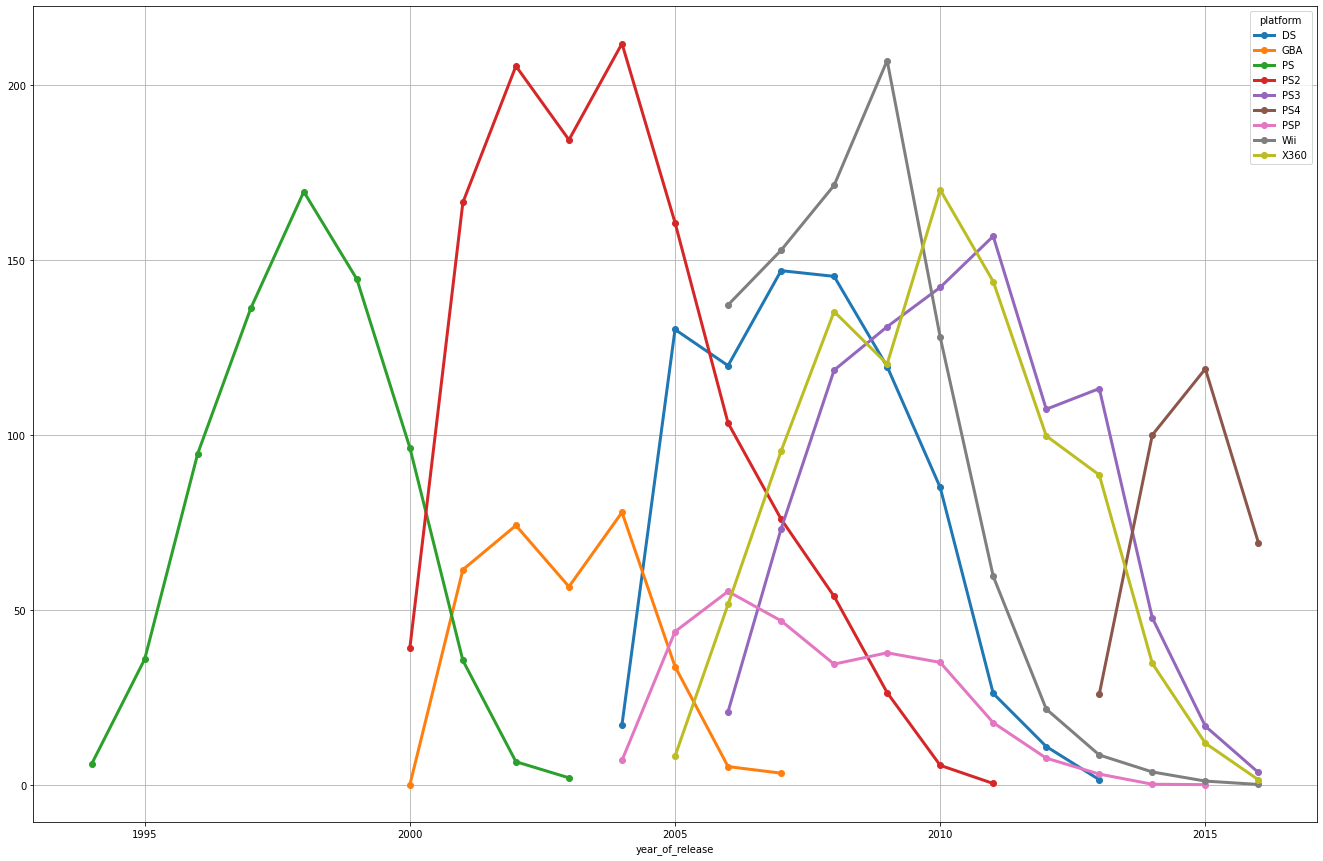

In [33]:
total_sales_platform_years.plot(figsize = (23, 15), grid=True, lw = 3, marker='o')

**Вывод**
<br><br>
На платформах с наибольшими продажами срок существования платформы составляет примерно 12 лет. 
<br><br>
Распределение продаж по годам для всех платформ с наибольшими продажами имеет нормальной распределение вида колокол - сначала продажи растут, далее на 4-5 год достигают максимума, а далее начинают падать.
<br><br>
При этом, можно наблюдать на платформах PS2, PS3, PS4, что после того, как платформа проходит максимальное число продаж и начинается спад продаж запускается новая платформа и её продажи начинают расти, а продажи предыдущей версии падать, а когда новая платформа достигает максимальных продаж, предыдущая платформа перестаёт существовать.

### Возьмём данные за соответствующий актуальный период

Возьмём данные из датафрейма `game` с 2014 по 2015 года и создадим новый датафрейм:

In [34]:
games_actual = games[games['year_of_release'].isin([2014, 2015])]
games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16667,Hanasaku Manimani,PSV,2014,Adventure,0.00,0.00,0.01,0.00,-1,-1,unknown,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,-1,-1,unknown,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,-1,-1,unknown,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,76,M,0.01


Посмотрим сумму продаж по платформам c 2015 года:

In [35]:
games_actual.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

platform
PS4     218.90
XOne    114.21
3DS      71.54
PS3      64.58
X360     46.70
WiiU     38.38
PC       21.80
PSV      18.15
Wii       4.89
PSP       0.36
Name: total_sales, dtype: float64

**Вывод**
<br><br>
Из предыдущих исследований можно сделать вывод, что к актуальному периоду для дальнейшего исследования относятся 2014 и 2015 года, тк индустрия компьютерных игр очень динамично изменяется и смотреть периоды более старые не актуально из-за смены трендов, а данные за 2016 год согласно ТЗ могут быть неполными.

### Не учитывайте в работе данные за предыдущие годы.

**Вывод**
<br><br>
Не будем учитывать в исследование период до 2014 года и после 2015, тк за индустрия компьютерных игр слишком динамично меняется и тренды меняются быстро, а данные за 2016 год согласно ТЗ могут быть неполными.

### Посмотрим какие платформы лидируют по продажам. Выясним растут или падают продажи. Выберем несколько потенциально прибыльных платформ.

Посмотрим какие платформы лидируют по продажам за актуальный период

In [36]:
total_sales_platform_actual = pd.pivot_table(games_actual, index='platform', values = 'total_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по платформам за актуальный период
total_sales_platform_actual = total_sales_platform_actual.sort_values(('total_sales'), ascending=False) # отсортируем по продажам от большего к меньшемуза актуальный период
total_sales_platform_actual = total_sales_platform_actual.drop('PSP') # уберём платформу PSP, тк в выбранном периоде у них самые низки продажи 
total_sales_platform_actual

,total_sales
platform,
PS4,218.90
XOne,114.21
3DS,71.54
PS3,64.58
X360,46.70
WiiU,38.38
PC,21.80
PSV,18.15
Wii,4.89


Сделаем таблицу с самыми успешно продаваемыми платформами за актуальный период с продажами и далее разобьём их по годам, чтобы увидеть растут они или падают:

In [37]:
games_actual_platform = games_actual[games_actual['platform'].isin(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'])] # оставим в таблице только топовые платформы
total_sales_actual_platform_years = pd.pivot_table(games_actual_platform, index='platform', columns='year_of_release',values = 'total_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по самым успешным платформам c 2015 года с разбивкой по годам
total_sales_actual_platform_years = total_sales_actual_platform_years.sort_values((2015), ascending=False)
total_sales_actual_platform_years = total_sales_actual_platform_years.T # развернём таблицу для наглядности и для дальнейшего построения графика
total_sales_actual_platform_years

platform,PS4,XOne,3DS,PS3,WiiU,X360,PC,PSV,Wii
year_of_release,,,,,,,,,
2014,100.0,54.07,43.76,47.76,22.03,34.74,13.28,11.90,3.75
2015,118.9,60.14,27.78,16.82,16.35,11.96,8.52,6.25,1.14


<AxesSubplot:xlabel='year_of_release'>

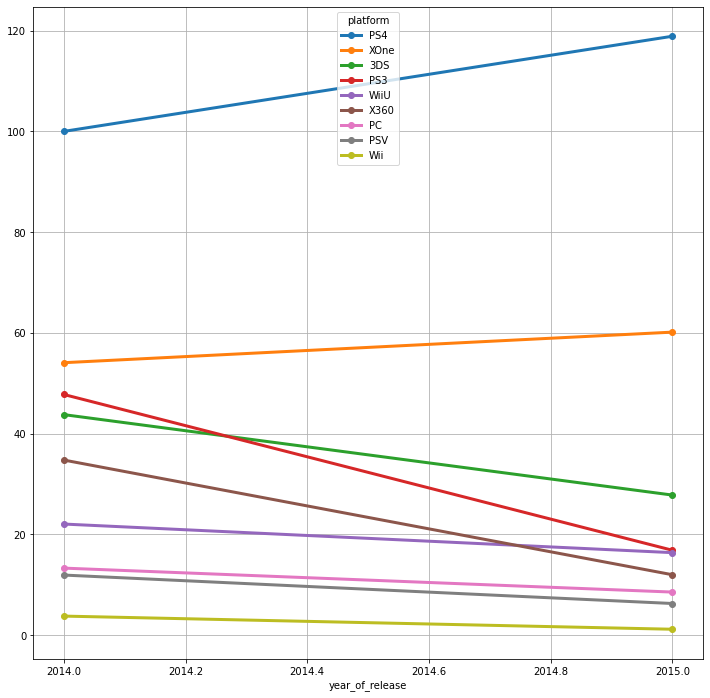

In [38]:
total_sales_actual_platform_years.plot(figsize = (12, 12), grid=True, lw = 3, marker='o')

**Вывод**
<br><br>
Из графика видно, что платформы из актуального периода исследования с 2014 по 2015 года находятся на этапе падения продаж, кроме PS4 и XOne. Есть только две платформа - это PS4 и XOne, которые находятся в стадии роста и они является самыми потенциально прибыльными платформами, тк растут и в целом продажи за исследуемый период по данным двум платформам максимально большие по отношению к остальным. Продажи платформы PS4 лидируют, на втором месте XOne.

### Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Изначально посмотрим как выглядит диаграмма размаха по  глобальным продажам актуальных платформ:

In [39]:
total_sales_platform_actual.describe()

,total_sales
count,9.000000
mean,66.572222
std,65.997561
min,4.890000
25%,21.800000
50%,46.700000
75%,71.540000
max,218.900000


(-10.0, 230.0)

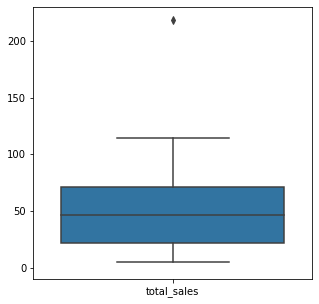

In [40]:
ax = plt.figure(figsize=(5,5))
ax = sns.boxplot(data = total_sales_platform_actual) 
ax.set_ylim(-10,230)

Перед построением диаграммы размаха по глобальным продажам за актуальный период уберём платформу PSP, тк в выбранном периоде у них самые низкие продажи: 

In [41]:
games_actual_boxplot = games_actual[games_actual['platform'] != 'PSP']

Теперь посмотрим как выглядит диаграмма размаха по глобальным продажам игр актуальных платформ:

In [42]:
games_actual_boxplot.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,166.0,0.430964,1.223959,0.01,0.0400,0.090,0.2575,11.68
PC,97.0,0.224742,0.391690,0.01,0.0300,0.080,0.2600,3.05
PS3,181.0,0.356796,0.685857,0.01,0.0400,0.120,0.4000,5.27
PS4,212.0,1.032547,1.935690,0.01,0.0900,0.290,0.9725,14.63
PSV,210.0,0.086429,0.162925,0.01,0.0200,0.040,0.1000,1.96
Wii,10.0,0.489000,0.651928,0.01,0.0325,0.165,0.8525,2.01
WiiU,59.0,0.650508,1.275634,0.01,0.0550,0.190,0.6050,7.09
X360,98.0,0.476531,0.657035,0.01,0.0800,0.230,0.6325,4.28
XOne,141.0,0.810000,1.220984,0.01,0.1100,0.320,0.9100,7.39


(-0.1, 15.0)

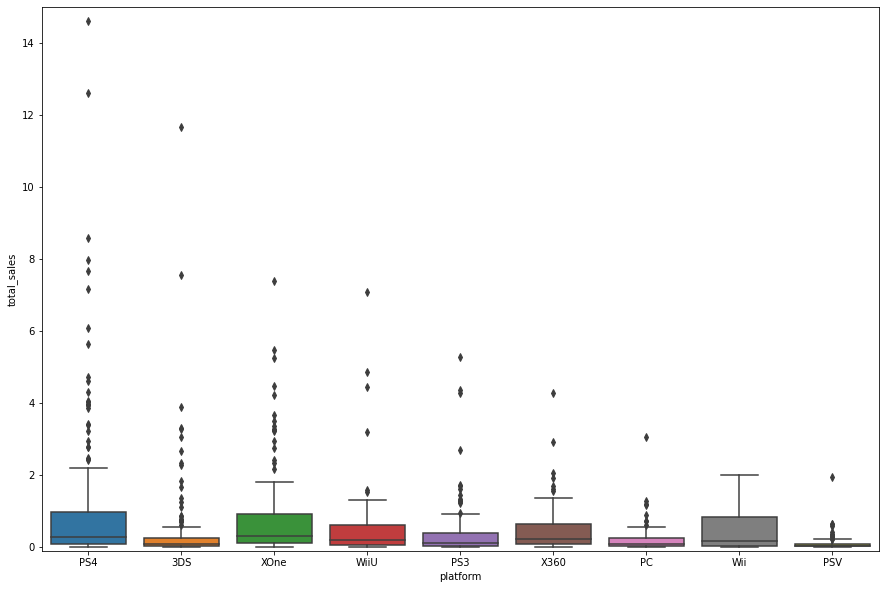

In [43]:
bx = plt.figure(figsize=(15,10))
bx = sns.boxplot(data = games_actual_boxplot, x = 'platform', y = 'total_sales')
bx.set_ylim(-0.1,15)

(0.0, 1.0)

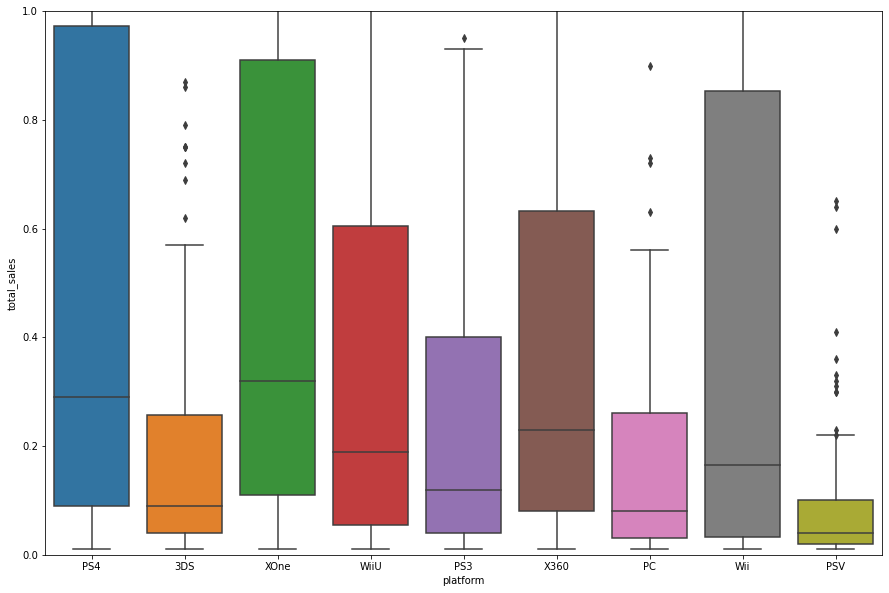

In [44]:
bx = plt.figure(figsize=(15,10))
bx = sns.boxplot(data = games_actual_boxplot, x = 'platform', y = 'total_sales')
bx.set_ylim(0,1)

**Вывод**
<br><br>
Если рассматривать глобальные продажи с разбивкой только по платформам, то одну платформу можно считать за  выброс - это `PS4`, тк число продаж на данной платформе значительно превышает продажи на других платформах.
<br><br>
Если рассматривать глобальные продажи игр с разбивкой по каждой платформе, то практически у каждой платформы имеются выбросы, кроме `Wii`.
<br> Это означает, что практически на всех платформах, кроме `Wii` есть конкретные игры с более значительными продажами, чем в основной массе игр платформы.
<br> У платформы `Wii` по продажам всех игр распределение идёт равномерное, это значит, что у данной платформы нет каких-то игр с выдающимися продажами.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Изучим зависимость продаж платформы PS4 от оценок критиков, предварительно убрав значения заглушки из оценок критиков:

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

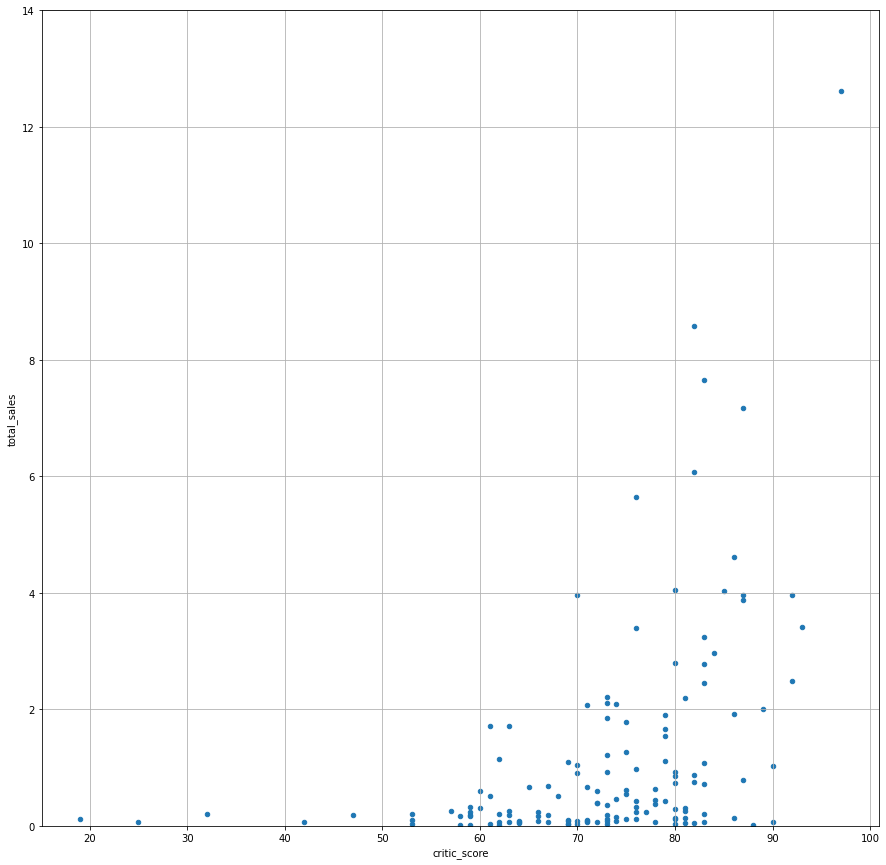

In [45]:
games_actual_critic = games_actual[games_actual['critic_score'] != -1]
games_actual_critic.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter',  ylim=(0, 14), figsize=(15, 15), grid=True)

Изучим зависимость продаж платформы PS4 от отзывов пользователей, предварительно убрав значения заглушки из отзывов пользователей:

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

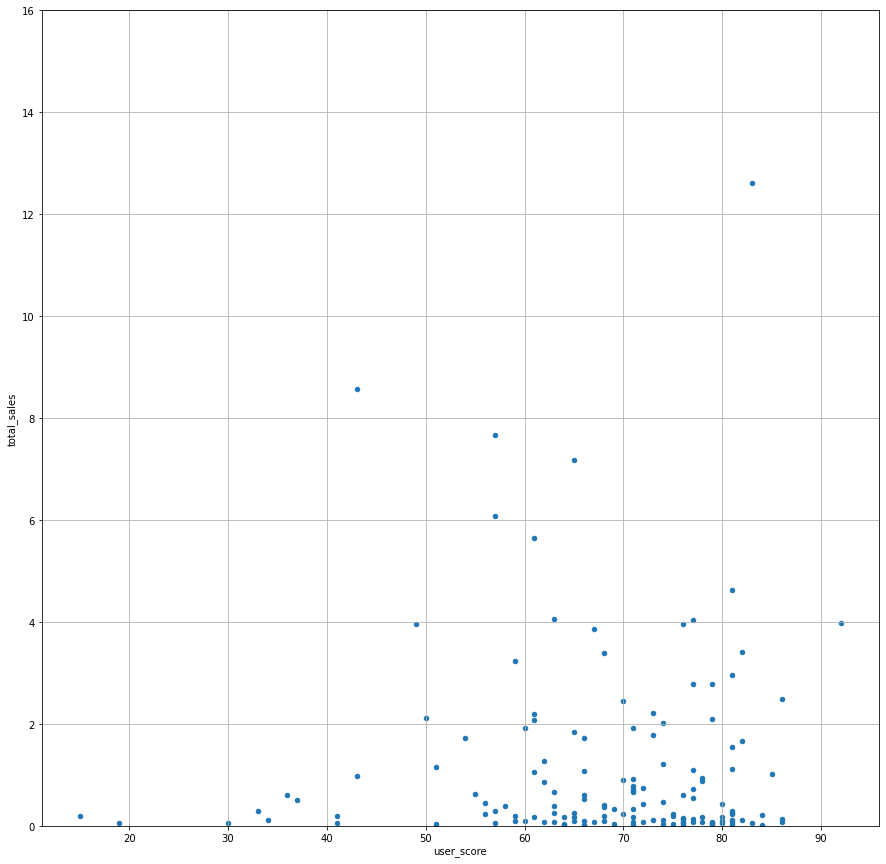

In [46]:
games_actual_user = games_actual[games_actual['user_score'] != -1]
games_actual_user.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter',  ylim=(0, 16), figsize=(15, 15), grid=True)

Посчитаем корреляцию между отзывами пользователей, оценками критиков и продажами для платфоры PS4:

In [47]:
games_actual_critic_user = games_actual_critic[games_actual_critic['user_score'] != -1]
games_actual_critic_user.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.602514,0.427817
user_score,0.602514,1.000000,-0.003283
total_sales,0.427817,-0.003283,1.000000


**Вывод**
<br><br>
Для платформы PS4 наблюдается прямая зависимость глобальных продаж от оценок критиков, а отзывы пользователей вообще не влияют на продажи на данной платформе.
<br><br>
Судя по таблице с расчитанной корреляцией отзывы пользователей не влияют на продажи в отличии от оценок критиков.
* Коэффициент корреляции между отзывами пользователей и продажами:  -0.00328.
* Коэффициент корреляции между оценками критиков и продажами:  0.4278.

### Соотнесём выводы с продажами игр на других платформах.

Посчитаем корреляцию между отзывами пользователей, оценками критиков и продажами по всем платформам за актуальный период:

In [48]:
games_actual_critic_user[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.537409,0.350509
user_score,0.537409,1.000000,0.032023
total_sales,0.350509,0.032023,1.000000


Посчитаем корреляцию между отзывами пользователей, оценками критиков и продажами по пяти самым продаваемым платформам суммарно за актуальный период:

In [49]:
games_actual_critic_user.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform =="PS3" or platform =="X360"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.601001,0.410567
user_score,0.601001,1.000000,0.034774
total_sales,0.410567,0.034774,1.000000


Посчитаем корреляцию между отзывами пользователей, оценками критиков и продажами по пяти самым продаваемым платформам по отдельности за актуальный период:

In [50]:
games_actual_critic_user.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.602514,0.427817
user_score,0.602514,1.000000,-0.003283
total_sales,0.427817,-0.003283,1.000000


In [51]:
games_actual_critic_user.query('platform == "XOne"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.453434,0.466241
user_score,0.453434,1.000000,-0.062044
total_sales,0.466241,-0.062044,1.000000


In [52]:
games_actual_critic_user.query('platform == "3DS"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.885494,0.306044
user_score,0.885494,1.000000,0.286141
total_sales,0.306044,0.286141,1.000000


In [53]:
games_actual_critic_user.query('platform == "PS3"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,0.156595
total_sales,0.446575,0.156595,1.000000


In [54]:
games_actual_critic_user.query('platform == "X360"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.625309,0.525723
user_score,0.625309,1.000000,0.336514
total_sales,0.525723,0.336514,1.000000


Посчитаем корреляцию между отзывами пользователей, оценками критиков и продажами по двум самым продаваемым платформам за актуальный период:

In [55]:
games_actual_critic_user.query('platform == "PS4" or platform == "XOne"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.535499,0.424632
user_score,0.535499,1.000000,-0.015210
total_sales,0.424632,-0.015210,1.000000


**Вывод**
<br><br>
Для всех исследуемых платформ наблюдается прямая задолжность глобальных продаж от оценок критиков и нулевая или очень низкая зависимость от отзывов пользователей. 
<br><br>
У ТОП-2 платформ по продажам корреляция имеет примерно одинаковое значение между продажами и оценками критиков, при этом отзывы пользователей имеют практически нулевую корреляцию, следовательно отзывы пользователей вообще не влияют на продажи:
* Коэффициент корреляции между отзывами пользователей и продажами:  -0.01524.
* Коэффициент корреляции между оценками критиков и продажами:  0.4246.

У всех платформ корреляция имеется зависимость между продажами и оценками критиков, при этом отзывы пользователей имеют практически нулевую корреляцию, следовательно отзывы пользователей вообще не влияют на продажи:
* Коэффициент корреляции между отзывами пользователей и продажами - 0.0348.
* Коэффициент корреляции между оценками критиков и продажами - 0.4106.


### Посмотрим на общее распределение игр по жанрам

Посмотрим на медианные значения и другие показатели по продажам по каждому жанру с сортировкой по медианному значению по убыванию:

In [56]:
total_sales_genre_actual = pd.pivot_table(games_actual, index='genre', values = 'total_sales', aggfunc='describe')# сделаем новую таблицу с подсчётом игр по жанрам за актуальный период
total_sales_genre_actual_median = total_sales_genre_actual.sort_values(('50%'), ascending=False) # отсортируем по медианному значению продаж по жанрам от большего к меньшему за актуальный период
total_sales_genre_actual_median

,25%,50%,75%,count,max,mean,min,std
genre,,,,,,,,
Shooter,0.3100,0.680,1.7200,81.0,14.63,1.638519,0.02,2.335047
Sports,0.0800,0.360,0.7700,113.0,8.58,0.760973,0.01,1.260565
Platform,0.0550,0.250,1.1600,23.0,3.21,0.646087,0.01,0.843697
Misc,0.0300,0.170,0.4100,81.0,5.27,0.431481,0.01,0.847930
Racing,0.0500,0.170,0.4300,45.0,7.09,0.549556,0.01,1.158267
Simulation,0.0400,0.160,0.3600,26.0,3.05,0.432308,0.01,0.809090
Fighting,0.0675,0.130,0.3200,44.0,7.55,0.539773,0.01,1.366628
Action,0.0400,0.110,0.3400,441.0,12.62,0.383787,0.01,0.916382
Role-Playing,0.0600,0.110,0.4650,167.0,11.68,0.498563,0.01,1.231749


Посмотрим на средние значение и другие показатели по продажам по каждому жанру с сортировкой по среднему значению по убыванию:

In [57]:
total_sales_genre_actual_mean = total_sales_genre_actual.sort_values(('mean'), ascending=False) # отсортируем по числу игр от большего к меньшему за актуальный период
total_sales_genre_actual_mean

,25%,50%,75%,count,max,mean,min,std
genre,,,,,,,,
Shooter,0.3100,0.680,1.7200,81.0,14.63,1.638519,0.02,2.335047
Sports,0.0800,0.360,0.7700,113.0,8.58,0.760973,0.01,1.260565
Platform,0.0550,0.250,1.1600,23.0,3.21,0.646087,0.01,0.843697
Racing,0.0500,0.170,0.4300,45.0,7.09,0.549556,0.01,1.158267
Fighting,0.0675,0.130,0.3200,44.0,7.55,0.539773,0.01,1.366628
Role-Playing,0.0600,0.110,0.4650,167.0,11.68,0.498563,0.01,1.231749
Simulation,0.0400,0.160,0.3600,26.0,3.05,0.432308,0.01,0.809090
Misc,0.0300,0.170,0.4100,81.0,5.27,0.431481,0.01,0.847930
Action,0.0400,0.110,0.3400,441.0,12.62,0.383787,0.01,0.916382


**Вывод**
<br><br>
Самыми прибыльными жанрами являются `Shooter, Sports и Platform`.
<br>Среднее и медианное значение ТОП-3 жанров расположены в одном порядке.
<br><br>
Выделяются жанры с низкими продажами - это `Strategy, Puzzle и Adventure`.
<br>
При этом, если у `Puzzle и Strategy` мало продаж, но и число игр выпущенно минимальное значение, то `Adventure` выпускается больше среднего значения по жанрам, но продажи входят АнтиТОП-3.

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)

Посчитаем продажи в Европе по платформам и определим для каждой платформы долю рынка:

In [58]:
top_platform_eu = pd.pivot_table(games_actual, index='platform', values = 'eu_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по региону за актуальный период с для каждой платформы
top_platform_eu['fraction_eu'] =  top_platform_eu['eu_sales']/top_platform_eu['eu_sales'].sum() # посчитаем долю рынка для каждой платформы
top_platform_eu = top_platform_eu.sort_values('eu_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Еврозоны
top_platform_eu

,eu_sales,fraction_eu
platform,,
PS4,98.26,0.447735
XOne,36.62,0.166864
PS3,24.28,0.110635
X360,14.78,0.067347
PC,14.44,0.065798
3DS,13.79,0.062836
WiiU,11.67,0.053176
PSV,3.14,0.014308
Wii,2.48,0.011300


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж у ТОП-5 платформам в Европе

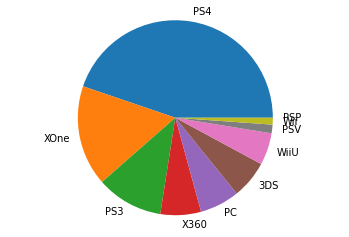

In [59]:
labels = top_platform_eu.index
values = top_platform_eu['fraction_eu']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

Посчитаем продажи в Японии по платформам и определим для каждой платформы долю рынка:

In [60]:
top_platform_jp = pd.pivot_table(games_actual, index='platform', values = 'jp_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по региону за актуальный период с для каждой платформы
top_platform_jp = top_platform_jp.sort_values('jp_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Японии
top_platform_jp['fraction_jp'] =  top_platform_jp['jp_sales']/top_platform_jp['jp_sales'].sum() # посчитаем долю рынка для каждой платформы
top_platform_jp

,jp_sales,fraction_jp
platform,,
3DS,36.21,0.490783
PSV,10.98,0.148821
PS3,9.92,0.134454
PS4,9.28,0.125779
WiiU,6.64,0.089997
PSP,0.36,0.004879
XOne,0.31,0.004202
X360,0.08,0.001084
PC,0.00,0.000000


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж у ТОП-5 платформам в Японии

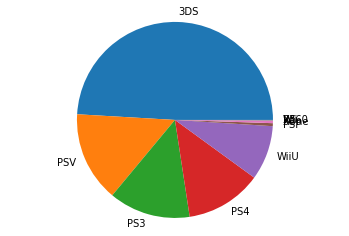

In [61]:
labels = top_platform_jp.index
values = top_platform_jp['fraction_jp']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

Посчитаем продажи в Северной Америке по платформам и определим для каждой платформы долю рынка:

In [62]:
top_platform_na = pd.pivot_table(games_actual, index='platform', values = 'na_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по региону за актуальный период с для каждой платформы
top_platform_na = top_platform_na.sort_values('na_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Японии
top_platform_na['fraction_na'] =  top_platform_na['na_sales']/top_platform_na['na_sales'].sum() # посчитаем долю рынка для каждой платформы
top_platform_na

,na_sales,fraction_na
platform,,
PS4,77.12,0.322502
XOne,67.00,0.280182
X360,27.61,0.115460
PS3,21.38,0.089407
3DS,18.50,0.077364
WiiU,17.26,0.072178
PC,5.87,0.024547
PSV,2.37,0.009911
Wii,2.02,0.008447


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж у ТОП-5 платформам в Северной Америке

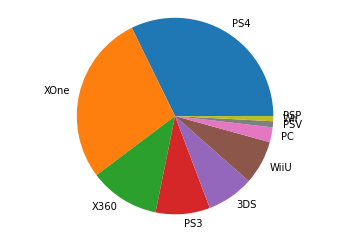

In [63]:
labels = top_platform_na.index
values = top_platform_na['fraction_na']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

**Вывод**
<br><br>
Самыми продаваемыми платформами (ТОП-5) для Северной Америки являются: 
* PS4 с долей рынка дродаж в 32,25%	
* XOne с долей рынка дродаж в 28,02%	
* X360 с долей рынка дродаж в 11,55%	
* PS3 с долей рынка дродаж в 8,94%
* 3DS с долей рынка дродаж в 7,74%	

Самыми продаваемыми платформами (ТОП-5) для Европы являются: 
* PS4 с долей рынка дродаж в 44,77%	
* XOne с долей рынка дродаж в 16,69%	
* PS3 с долей рынка дродаж в 11,06%	
* X360 с долей рынка дродаж в 6,73%
* PC с долей рынка дродаж в 6,58%


Самыми продаваемыми платформами (ТОП-5) для Японии являются: 
* 3DS с долей рынка дродаж в 49,08%	
* PSV с долей рынка дродаж в 14,88%	
* PS3 с долей рынка дродаж в 13,45%	
* PS4 с долей рынка дродаж в 12,58%
* WiiU с долей рынка дродаж в 9%

В Северной Америке, Европе и Японии в ТОП-5 входят одни и те же  платформы из списков выше, кроме пятой строчки.
<br>В Северной Америке пятую строчку занимает 3DS, а в Европе PC.
<br>
В Японии платформы в ТОП-5 значительно отличаются, тк Японский рынок является специфичным.


### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5)

Посчитаем продажи в Европе по жанрам и определим для каждой платформы долю рынка в Европе:

In [64]:
top_genre_eu = pd.pivot_table(games_actual, index='genre', values = 'eu_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по региону за актуальный период для каждого жанра
top_genre_eu = top_genre_eu.sort_values('eu_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Еврозоны
top_genre_eu['fraction_eu'] =  top_genre_eu['eu_sales']/top_genre_eu['eu_sales'].sum() # посчитаем долю рынка для каждого жанра
top_genre_eu

,eu_sales,fraction_eu
genre,,
Action,64.00,0.291625
Shooter,49.62,0.226100
Sports,33.72,0.153650
Role-Playing,23.89,0.108858
Racing,12.36,0.056320
Misc,12.20,0.055591
Simulation,6.03,0.027477
Platform,5.41,0.024651
Fighting,5.35,0.024378


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж у ТОП-5 жанров в Европе

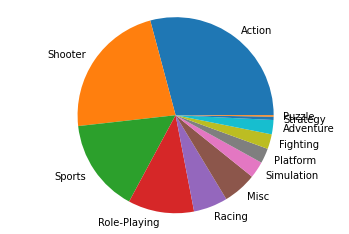

In [65]:
labels = top_genre_eu.index
values = top_genre_eu['fraction_eu']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

Посчитаем продажи в Японии по жанрам и определим для каждой платформы долю рынка в Японии:

In [66]:
top_genre_jp = pd.pivot_table(games_actual, index='genre', values = 'jp_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по региону за актуальный период для каждого жанра
top_genre_jp = top_genre_jp.sort_values('jp_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Еврозоны
top_genre_jp['fraction_jp'] =  top_genre_jp['jp_sales']/top_genre_jp['jp_sales'].sum() # посчитаем долю рынка для каждого жанра
top_genre_jp

,jp_sales,fraction_jp
genre,,
Role-Playing,24.55,0.332746
Action,22.51,0.305096
Fighting,5.62,0.076172
Misc,4.57,0.061941
Shooter,3.81,0.051640
Platform,2.58,0.034969
Adventure,2.42,0.032800
Sports,2.34,0.031716
Simulation,1.98,0.026837


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж у ТОП-5 жанров в Японии

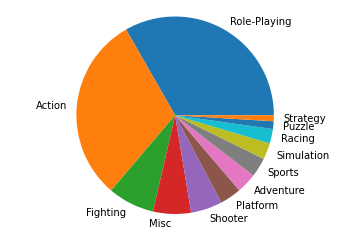

In [67]:
labels = top_genre_jp.index
values = top_genre_jp['fraction_jp']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

Посчитаем продажи в Северной Америке по жанрам и определим для каждой платформы долю рынка в Северной Америке:

In [68]:
top_genre_na = pd.pivot_table(games_actual, index='genre', values = 'na_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по региону за актуальный период для каждого жанра
top_genre_na = top_genre_na.sort_values('na_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Еврозоны
top_genre_na['fraction_na'] =  top_genre_na['na_sales']/top_genre_na['na_sales'].sum() # посчитаем долю рынка для каждого жанра
top_genre_na

,na_sales,fraction_na
genre,,
Action,63.24,0.264459
Shooter,62.78,0.262535
Sports,38.59,0.161377
Role-Playing,27.58,0.115335
Misc,14.29,0.059758
Fighting,10.59,0.044286
Racing,8.01,0.033496
Platform,5.50,0.023000
Adventure,4.69,0.019613


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж у ТОП-5 жанров в Северной Америке

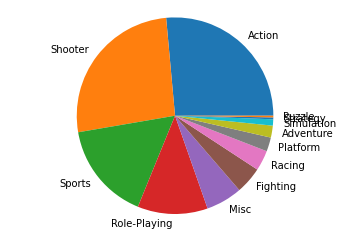

In [69]:
labels = top_genre_na.index
values = top_genre_na['fraction_na']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

**Вывод**
<br><br>
Самыми продаваемыми жанрами (ТОП-5) для Северной Америки являются: 
* Action с долей рынка дродаж в 26,45%	
* Shooter с долей рынка дродаж в 26,25%	
* Sports с долей рынка дродаж в 16,14%	
* Role-Playing 	 с долей рынка дродаж в 11,53%
* Misc с долей рынка дродаж в 5,96%	

Самыми продаваемыми жанрами (ТОП-5) для Европы являются: 
* Action с долей рынка дродаж в 29,16%	
* Shooter с долей рынка дродаж в 22,61%	
* Sports с долей рынка дродаж в 15,37%	
* Role-Playing 	 с долей рынка дродаж в 10,89%
* Racing с долей рынка дродаж в 5,63%

Самыми продаваемыми жанрами (ТОП-5) для Японии являются: 
* Role-Playing с долей рынка дродаж в 33,27%	
* Action с долей рынка дродаж в 30,51%	
* Fighting с долей рынка дродаж в 7,61%	
* Misc с долей рынка дродаж в 6,19%
* Shooter с долей рынка дродаж в 5,16%

В Северной Америке и Европе в четыре первых самых продаваемых жанра из ТОП-5 входят одни и те же жанры из списков выше. 
<br>
Отличается только последний жанр из ТОП-5, для Северной Америки - это Misc, а для Европы - Racing.
<br>
Доли продаж по жанрам у Северной Америки и Европе тоже очень похожи для каждого жанра.
<br><br>
В Японии в ТОП-5 жанров игр по продажам тоже входят 4 жанра, что и у Европы, и Северной Америке, но доли в значительной мере отличаются и места лидерства продаж тоже другие.
<br>
В Японии нет в ТОП-5 жанров такого жанра как Sports, хотя он присутствует на третьем месте в Европе и Северной Америке. Видимо вместо жанра Sports в Японии активно играют в жанр Fighting.

### Определим для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе

Посчитаем продажи в Европе за актуальный период для каждого значения рейтинга и отсортируем по убыванию продаж региона Европа:

In [70]:
top_rating_eu= pd.pivot_table(games_actual, index='rating', values = 'eu_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по регионам за актуальный период для каждого значения рейтинга
top_rating_eu = top_rating_eu.sort_values('eu_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Еврозоны
top_rating_eu['fraction_eu'] =  top_rating_eu['eu_sales']/top_rating_eu['eu_sales'].sum() # посчитаем долю рынка для каждого значения рейтинга
top_rating_eu

,eu_sales,fraction_eu
rating,,
M,76.90,0.350406
unknown,51.48,0.234576
E,44.45,0.202543
T,24.28,0.110635
E10+,22.35,0.101841


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж для каждого рейтинга в Европе

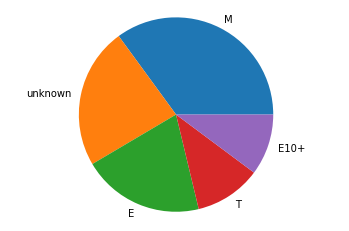

In [71]:
labels = top_rating_eu.index
values = top_rating_eu['fraction_eu']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

Посчитаем продажи в Японии за актуальный период для каждого значения рейтинга и отсортируем по убыванию продаж региона Япония:

In [72]:
top_rating_jp= pd.pivot_table(games_actual, index='rating', values = 'jp_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по регионам за актуальный период для каждого значения рейтинга
top_rating_jp = top_rating_jp.sort_values('jp_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Еврозоны
top_rating_jp['fraction_jp'] =  top_rating_jp['jp_sales']/top_rating_jp['jp_sales'].sum() # посчитаем долю рынка для каждого значения рейтинга
top_rating_jp

,jp_sales,fraction_jp
rating,,
unknown,42.58,0.577121
T,12.51,0.169558
E,7.87,0.106668
M,6.81,0.092301
E10+,4.01,0.054351


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж для каждого рейтинга в Япония

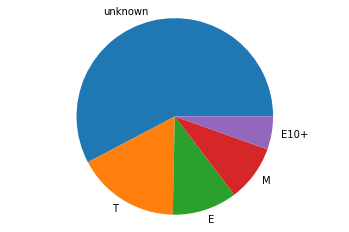

In [73]:
labels = top_rating_jp.index
values = top_rating_jp['fraction_jp']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

Посчитаем продажи в Северной Америке за актуальный период для каждого значения рейтинга и отсортируем по убыванию продаж региона Северная Америка:

In [74]:
top_rating_na= pd.pivot_table(games_actual, index='rating', values = 'na_sales', aggfunc='sum')# сделаем новую таблицу с подсчётом продаж по регионам за актуальный период для каждого значения рейтинга
top_rating_na = top_rating_na.sort_values('na_sales', ascending=False) # отсортируем по сумме продаж от большего к меньшему за актуальный период для Еврозоны
top_rating_na['fraction_na'] =  top_rating_na['na_sales']/top_rating_na['na_sales'].sum() # посчитаем долю рынка для каждого значения рейтинга
top_rating_na

,na_sales,fraction_na
rating,,
M,80.75,0.337682
unknown,56.19,0.234977
E,42.77,0.178857
T,30.00,0.125455
E10+,29.42,0.123029


Построим круговую диаграмму, чтобы наглядно увидеть различия в долях продаж для каждого рейтинга в Северной Америке

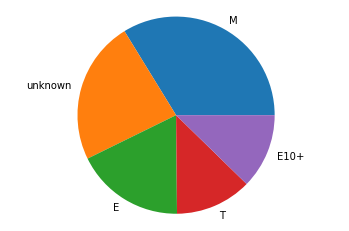

In [75]:
labels = top_rating_na.index
values = top_rating_na['fraction_na']
plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

**Вывод**
<br><br>
В Северной Америке, Европе и Японии самые продаваемые значения рейтинга - M, E ,T. 
<br>
В Северной Америке, Европе и Японии вообще не покупают игры со значением рейтинга - EC, AO, RP 
<br><br>
В Северной Америке и Европе самые продаваемые значения рейтинг имеют практические одинаковые доли рынка.
<br>
Из таблиц и графиков выше видно, что рейтинг влияет в Северной Америке с Европой по разному по отношению к Японии.
<br> В Северной Америке и Европе самый продаваемый рейтинг - М, а в Япони - 


## Проверим гипотезы

### Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевой гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>
Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различаются**
<br><br>
Проверим нулевую гипотезу используя гипотезу о равенстве средних двух генеральных совокупностей с помощью метода `scipy.stats.ttest_ind` и будем считать, что дисперсии двух выборок различаются:

In [76]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(games_actual_user.query('platform == "XOne"')['user_score'],
                       games_actual_user.query('platform == "PC"')['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.20641501693311365
Не получилось отвергнуть нулевую гипотезу


**Вывод**
<br><br>
Мы не смогли отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br><br>
Следовательно мы отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

### Проверим гипотезу, что cредние пользовательские рейтинги жанров Action и Sports разные

**Нулевой гипотеза - cредние пользовательские рейтинги жанров Action и Sports одинаковые.
<br>
Альтернативная гипотеза - cредние пользовательские рейтинги жанров Action и Sports различаются.**
<br><br>
Проверим нулевую гипотезу используя гипотезу о равенстве средних двух генеральных совокупностей с помощью метода `scipy.stats.ttest_ind` и будем считать, что дисперсии двух выборок различаются:

In [77]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(games_actual_user.query('genre == "Action"')['user_score'],
                       games_actual_user.query('genre == "Sports"')['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  5.639159825656798e-13
Отвергаем нулевую гипотезу


**Вывод**
<br><br>
Мы отвергаем нулевую гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports одинаковые.
<br><br>
Следовательно мы не можем отвергнуть гипотезу, что cредние пользовательские рейтинги жанров Action и Sports различаются..

## Общий вывод

Нам нужно было выявить определяющие успешность игры закономерности. Это позволило сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.
<br><br>
На мой взгляд все платформы которые мы смотрим из актуального периода уже прошли стадии роста, пика и на 2016 год уже не продаются или продажи сильно уали. Есть только две платформы - это PS4 и XOne, которые находятся в стадии роста и они является самыми потенциально прибыльными платформами. Продажи платформы PS4 лидируют, на втором месте XOne.
<br><br>
Для платформы PS4 наблюдается прямая зависимость глобальных продаж от оценок критиков. 
<br><br>
Судя по таблице с расчитанной корреляцией отзывы пользователей не влияют на продажи, в отличии от оценок критиков.
* Коэффициент корреляции между отзывами пользователей и продажами:  -0.00328.
* Коэффициент корреляции между оценками критиков и продажами:  0.4278.

Самыми прибыльными жанрами являются `Shooter, Sports и Platform`.
<br>Среднее и медианное значение ТОП-3 жанров расположены в одном порядке.
<br><br>
**Таким образом можно сделать вывод, что ставку на потенциально популярный продукт стоит сделать на играх жанров `Shooter, Sports и Platform` платформы `PS4` или `XOne` и планировать рекламные компании на 2017 год нужно в этих направлениях.**